# 5_1. Tuning the parameters of KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/SMOTE/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/SMOTE/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/SMOTE/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/SMOTE/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

In [4]:
#investigate the best choices
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree'] 
    }

knn = KNeighborsClassifier()


kappa_scorer = make_scorer(cohen_kappa_score)
grid_search = GridSearchCV(knn, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20, scoring=kappa_scorer)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichi

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

In [6]:
#investigate the best choices 
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'] 
    }

knn = KNeighborsClassifier()


kappa_scorer = make_scorer(cohen_kappa_score)
grid_search = GridSearchCV(knn, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20, scoring='f1')
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

In [25]:
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'] 
    }

knn = KNeighborsClassifier()


kappa_scorer = make_scorer(cohen_kappa_score)
grid_search = GridSearchCV(knn, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichi

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

The parameter {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'} was chosen with' Kappa'

The　parameter {{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'} was chosen with 'f1'

In [27]:
#f1
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix

knn1= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, weights= 'uniform')
knn_tuned = knn1.fit(X_train, y_train)

# the classification report

# Assuming X_test is a pandas DataFrame
X_test_array = X_test.values

# Now you can use X_test_array for prediction
y_pred = knn_tuned.predict(X_test_array)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[759 274]
 [134 240]]


In [28]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

No     893
Yes    514
Name: count, dtype: int64

In [29]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
No       1033
Yes       374
Name: count, dtype: int64

In [30]:

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")  # Specify pos_label=1 for binary classification
recall = recall_score(y_test, y_pred, pos_label="Yes")        # Specify pos_label=1 for binary classification
f1 = f1_score(y_test, y_pred, pos_label="Yes")                # Specify pos_label=1 for binary classification

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df1 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df1)

Accuracy: 0.7100213219616205
Precision: 0.4669260700389105
Recall: 0.6417112299465241
F1 Score: 0.5405405405405406


,Metric,Score
0,Accuracy,0.710021
1,Precision,0.466926
2,Recall,0.641711
3,F1-Score,0.540541
4,Kappa,0.336308


In [31]:
# The parameter {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'} was chosen with' Kappa'
               
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix

knn2= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, weights= 'distance')
knn_tuned2 = knn2.fit(X_train, y_train)

# the classification report

# Assuming X_test is a pandas DataFrame
X_test_array = X_test.values

# Now you can use X_test_array for prediction
y_pred2 = knn_tuned2.predict(X_test_array)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[785 248]
 [155 219]]


In [32]:
y_pred_df2 = pd.DataFrame(y_pred2)

y_pred_df2.value_counts()

No     940
Yes    467
Name: count, dtype: int64

In [33]:

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, pos_label="Yes")  # Specify pos_label=1 for binary classification
recall = recall_score(y_test, y_pred2, pos_label="Yes")        # Specify pos_label=1 for binary classification
f1 = f1_score(y_test, y_pred2, pos_label="Yes")                # Specify pos_label=1 for binary classification

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
kappa = cohen_kappa_score(y_test, y_pred2)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

Accuracy: 0.7135749822316987
Precision: 0.4689507494646681
Recall: 0.5855614973262032
F1 Score: 0.5208085612366231


,Metric,Score
0,Accuracy,0.713575
1,Precision,0.468951
2,Recall,0.585561
3,F1-Score,0.520809
4,Kappa,0.320095


In [43]:
metrics_df1.to_csv('../data/metrics/SMOTE_knn_metrics.csv', index=False)

### Variable Importance 

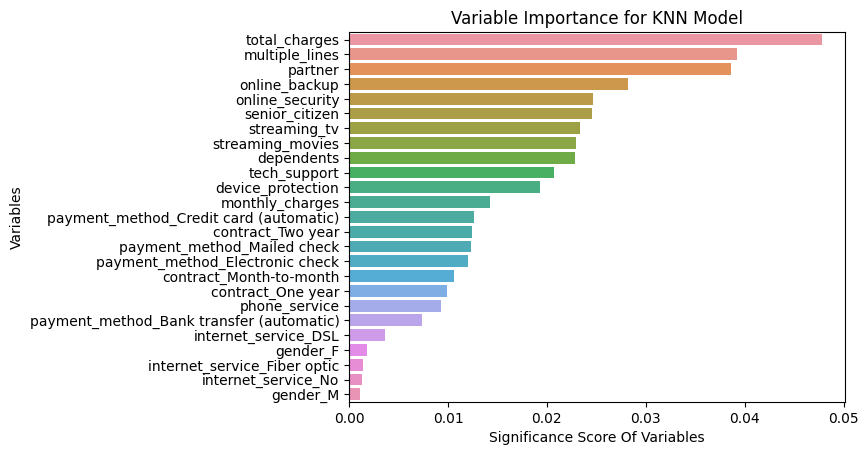

In [4]:
from sklearn.inspection import permutation_importance



# Convert X_train and X_test to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

#knn_tuned = knn1.fit(X_train_array, y_train)
knn1= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, weights= 'uniform')

knn_tuned = knn1.fit(X_train_array, y_train)

# Calculate permutation feature importances
result = permutation_importance(knn_tuned, X_train_array, y_train, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for KNN Model")
plt.show()


In [5]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
total_charges,0.047772
multiple_lines,0.039262
partner,0.038596
online_backup,0.028172
online_security,0.024625


In [6]:
feature_importances_df.T.to_csv('../data/Significant_Score/T_SMOTE_KNN_Significance_Score.csv', index=False)